In [98]:
output_folder = "/Users/Jayee/Library/CloudStorage/OneDrive-UW-Madison/\
PhD(my_PC)/PhD(output_files)/Engineering_projects/\
Shear_loading/240807_moments_compare/240807_mom_compare_plots"

In [42]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Inputting the moment values
#parent directory
parent_input_folder = "/Users/Jayee/Library/CloudStorage/OneDrive-UW-Madison/PhD(Data)/shear_data/vm_data"
# read the tmvsk.py file from individual subfolders
# directory structure :
## parent_directory/vm_#/moments_vm_stress/t_mvskm5m6_#.npy
# sf_l1 denotes subfolder_level1
# sf_l2 denotes subfolder_level2
sf_l2 = "moments_vm_stress"

sf_l1_list = [_ for _ in os.listdir(parent_input_folder) if os.path.isdir(os.path.join(parent_input_folder,_))]

tmvsk_list = []
data_identity_list = []
for sf_l1 in sf_l1_list:
    data_identity = sf_l1[-3:]
    data_identity_list.append(data_identity)
    input_folder = os.path.join(parent_input_folder,sf_l1,sf_l2)
    input_file_name = os.listdir(input_folder)[0]
    input_file_path = os.path.join(input_folder,input_file_name)
    print(input_file_path)
    _ = np.load(input_file_path)
    tmvsk_list.append(_)

/Users/Jayee/Library/CloudStorage/OneDrive-UW-Madison/PhD(Data)/shear_data/vm_data/vm_800/moments_vm_stress/t_mvskm5m6_800.npy
/Users/Jayee/Library/CloudStorage/OneDrive-UW-Madison/PhD(Data)/shear_data/vm_data/vm_701/moments_vm_stress/t_mvskm5m6_701.npy


['800', '701']

In [91]:
# Plotting the numpy files withrespect to time on x axis in microseconds
quantities = ["Mean", "Var", "Skew", "Kurt", "M5", "M6"]
colors = ["red","blue"]
shapes = ['o', '^', 'v', 's', 'D', '*']
data = [[[tmvsk[:,0],tmvsk[:,_]] for tmvsk in tmvsk_list] for _ in [1,2,3,4,5,6]]
#qs_w_ps = quantities with properties
qs_w_ps = list(zip(quantities,shapes,data))

In [99]:
# sequence is just used while saving the file. so that mean is saved first, then var, then skw, kurt, m5, m6
def my_plot(q_w_ps,sequence):
     ## Definig the axis labels and title
    fig,axs = plt.subplots(1,1,figsize=[10,8])
    axs.set_title(f"{q_w_ps[0]} evolution corrsponding to data", fontweight="bold", fontsize=16)
    axs.set_xlabel("Time in micro seconds", fontsize=14, fontweight="bold")
    axs.set_ylabel(f"{q_w_ps[0]}", fontweight="bold", fontsize=14)

    # Plotting the quantity
    for _ in range(len(data_identity_list)):
        plt.scatter(q_w_ps[2][_][0],q_w_ps[2][_][1], c = colors[_],
                marker = q_w_ps[1], s=100, edgecolor="k",linewidths=2, label=f"{data_identity_list[_]}",zorder = 2)

    ## Defining the legend and aesthetics
    axs.legend(loc="best",fontsize=12,facecolor="pink",edgecolor="k")
    axs.set_facecolor("#f4f4f4")
    axs.grid(linestyle="--", zorder=1)
    axs.tick_params(labelsize=12)
    
    # saving the plots
    file_name = f"{sequence}_{q_w_ps[0]}.pdf"
    file_location = os.path.join(output_folder,file_name)
    plt.savefig(file_location)

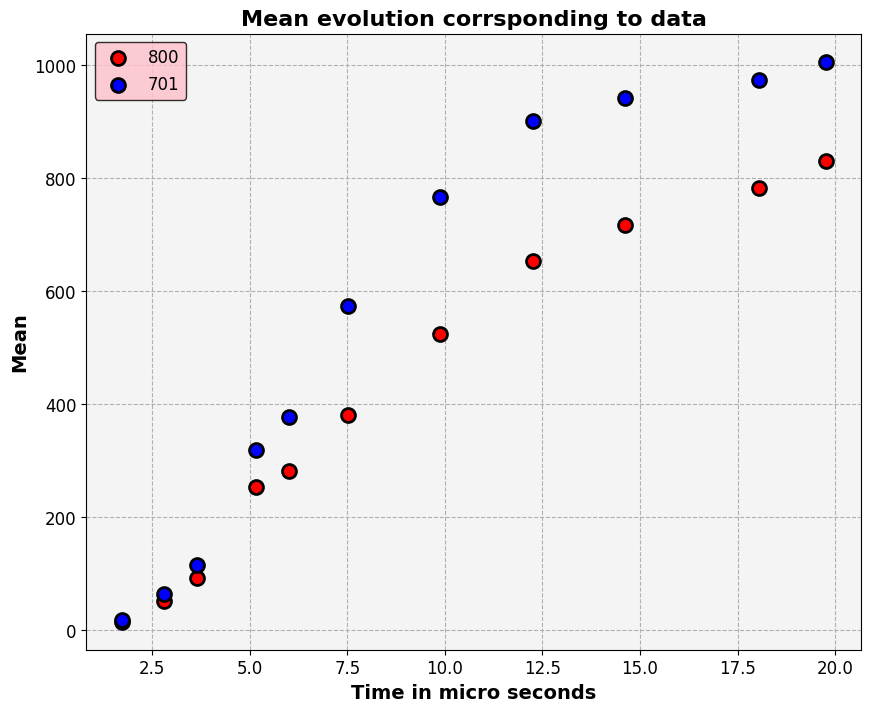

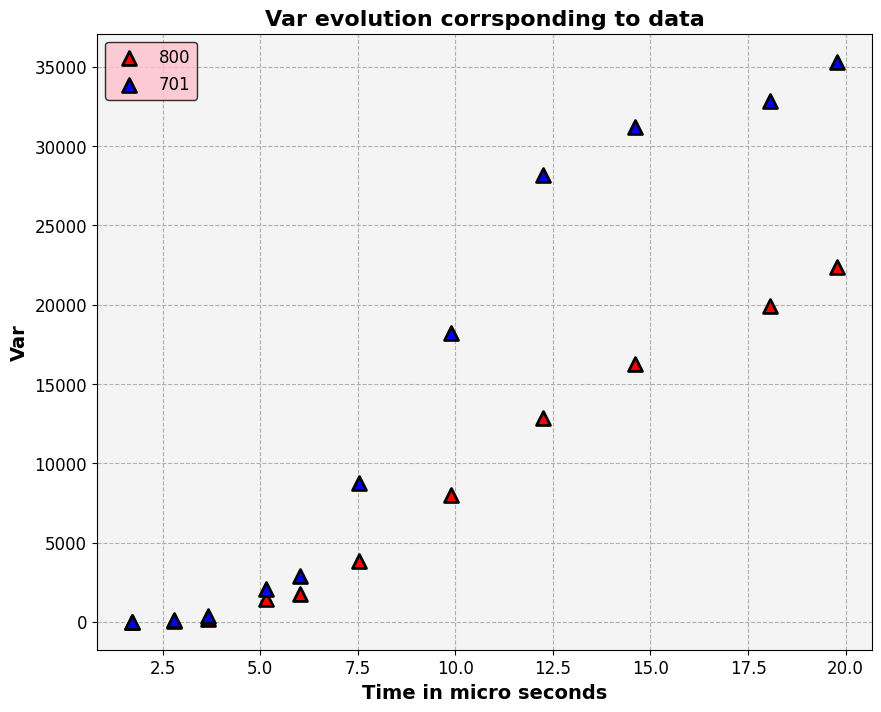

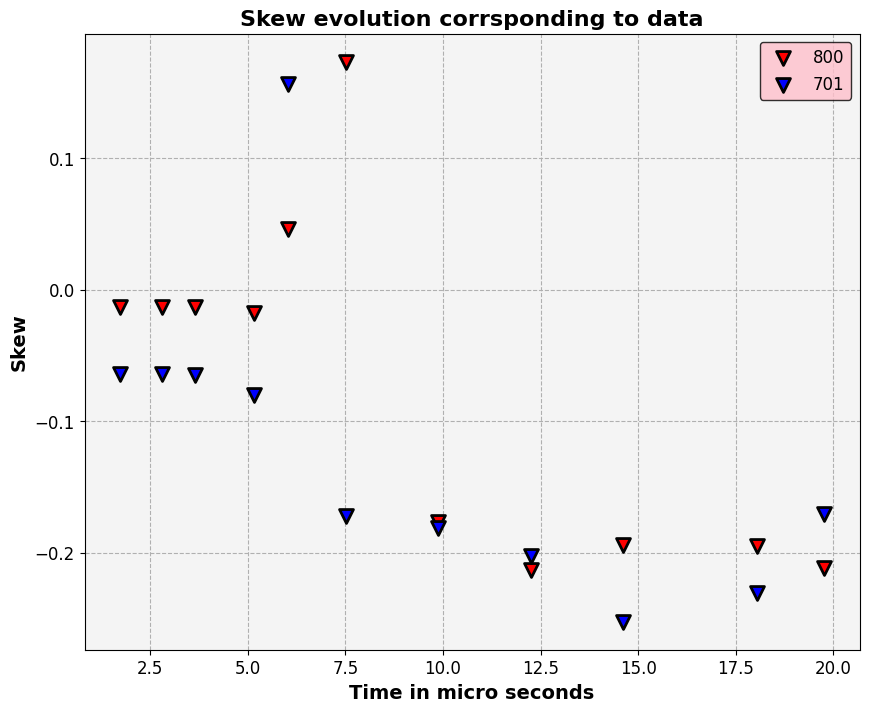

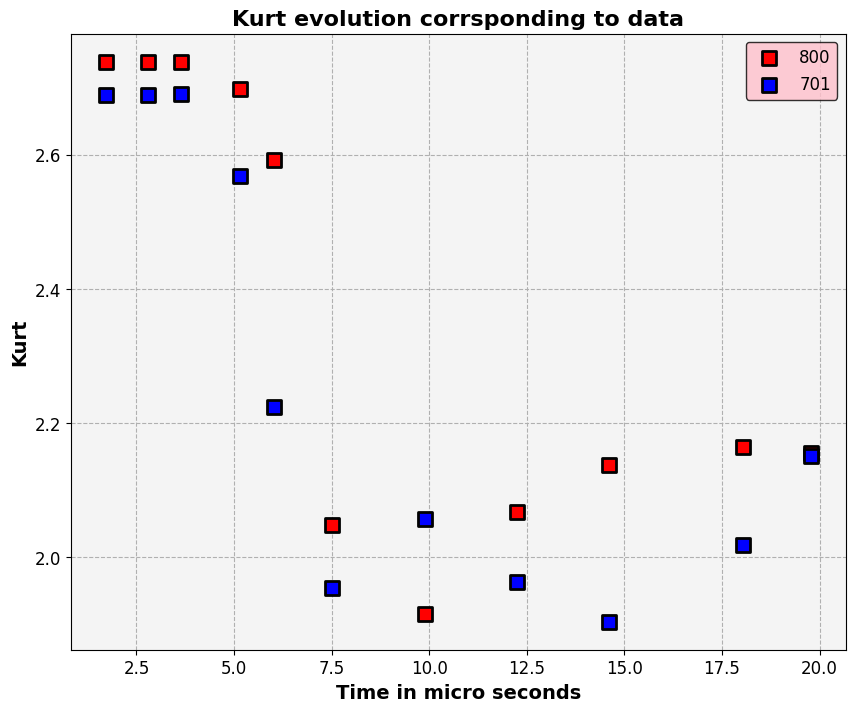

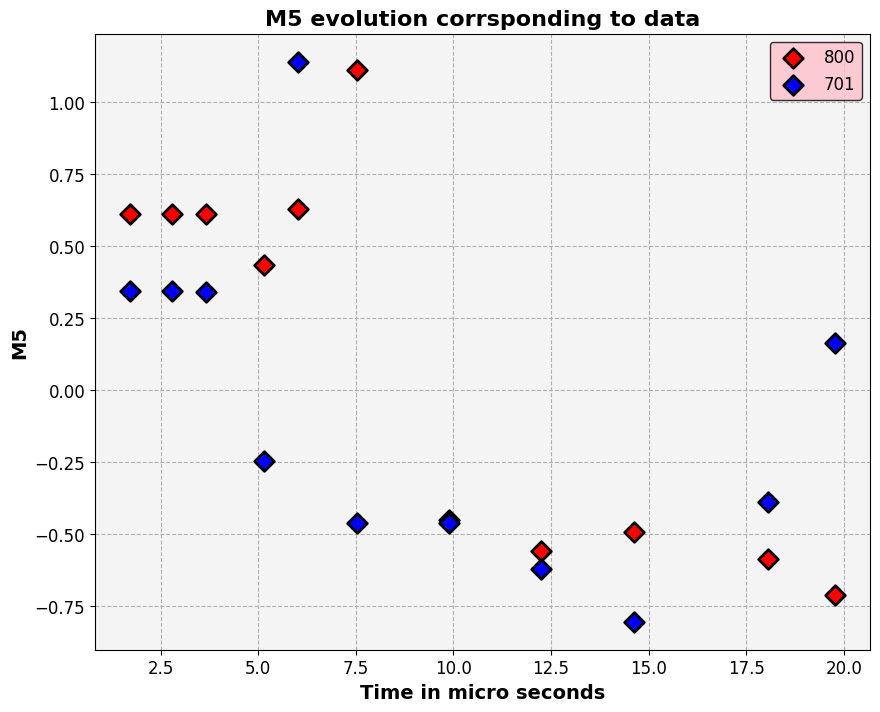

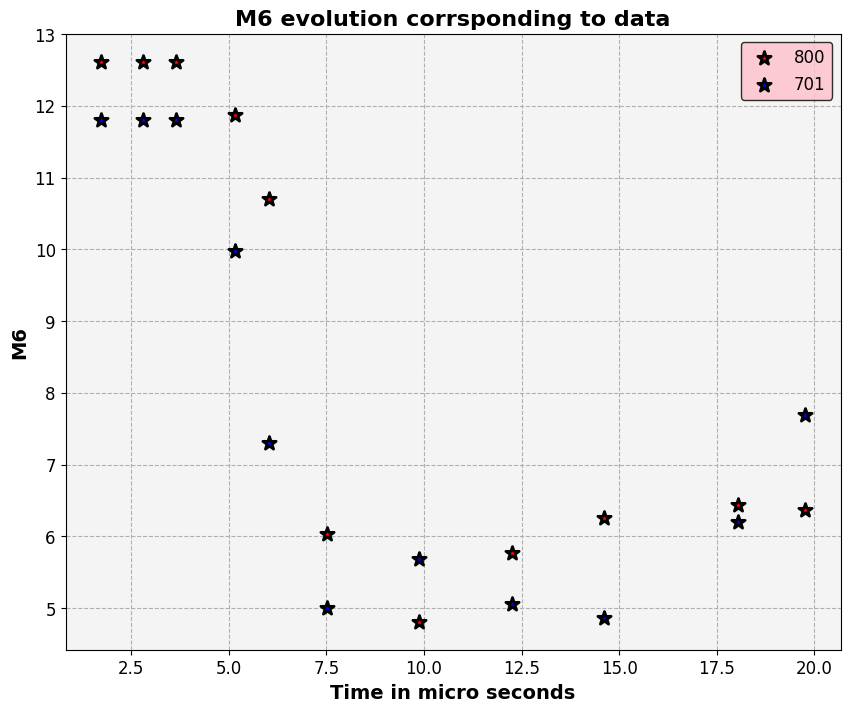

In [100]:
for _,q_w_ps in enumerate(qs_w_ps):
    my_plot(q_w_ps,_)

In [87]:
qs_w_ps[0][2][0]

[array([ 1.7191,  2.7936,  3.6532,  5.1574,  6.017 ,  7.5212,  9.885 ,
        12.2488, 14.6126, 18.0509, 19.77  ]),
 array([ 14.90428058,  50.92125423,  92.17187657, 253.0377784 ,
        281.98557088, 381.71740288, 525.10027286, 653.6442424 ,
        717.78628258, 782.31092568, 830.52146036])]

In [82]:
q_w_ps[3][0]

NameError: name 'q_w_ps' is not defined

In [13]:
sf_l2 = "moments_vm_stress"